#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df = pd.read_csv("imdb_top_10000.txt", names = ['imdbID','title','year','score','votes',
                                                'runtime','genres'], delimiter='\t')
df.head()

imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [21]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [22]:
df.isna().sum() 

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64

In [23]:
 df[df.genres.isna()==True] 

imdbID             title  year  score  votes   runtime genres
7917  tt0990404  Chop Shop (2007)  2007    7.2   2104  84 mins.    NaN

In [24]:
df.dropna(subset=['genres'],inplace=True)

In [25]:
 df.isna().sum() 

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     0
dtype: int64

In [26]:
df.shape

(9999, 7)

## 2. Asking Questions

Which movie has the highest rated movie of specific year?

Finding the Longest and shortest runtime of the dataset.

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

In [27]:
df.head()

imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [28]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [29]:
mins = [int(runtime.split(' ')[0]) for runtime in df.runtime]
df['runtime'] = mins
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [30]:
genre_set=set()
for genre in df.genres:
  genre_set.update(genre.split('|'))
len(genre_set) 

24

In [31]:
for genre in genre_set:
  df[genre]=[genre in row.split("|") for row in df.genres]
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  Film-Noir  Action  Drama  ...  Musical  \
0                       Crime|Drama      False   False   True  ...    False   
1                    Crime|Thriller      False   False  False  ...    False   
2            Drama|Mystery|Thriller      False   False   True  ...    False   
3           Action|Adventure|Sci-Fi      False    True  False  ...    False   
4  Action|Adventure|Sci-Fi|Thriller      False    True  False  ...    False   

   Adventure  Animation  Comedy  Crime  History  Fantasy  Sport   News  \
0      False      False   False   True    False    False  False  False   
1      False      False   False   True    False    False  False  False   
2      False      False   False  False    False    False  False  False   
3       True      False   False  False    False    False  False  False   
4       True      False   False  False    False    False  False  False   

   Romance  
0    False  
1    False  
2    False  
3    False  
4    False  

[5 rows x 31 columns]

In [32]:
##Get the first Title
t = df.title[0]
t

'The Shawshank Redemption (1994)'

In [33]:
df['title'] = [title[0:-7] for title in df.title]
df.title

0       The Shawshank Redemption
1                   Pulp Fiction
2                     Fight Club
3                     The Matrix
4                      Inception
                  ...           
9995                     Meduzot
9996              Daltry Calhoun
9997      The Quiller Memorandum
9998                        Taal
9999              The Navigators
Name: title, Length: 9999, dtype: object

## 4. EDA

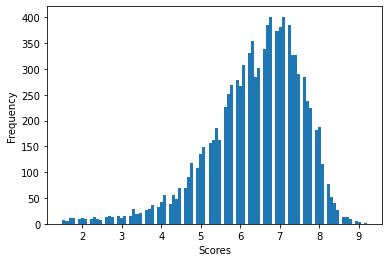

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
x = df.score
plt.hist(x,bins=100)
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.show()

 We learned that more scores are more frequent in and around 6-8

## 5. Determining Best Movies

In [35]:
movies = df.groupby('year',sort=False)
movies

In [36]:
year_1994 = movies.get_group(1994)
year_1994.head()

imdbID                     title  year  score   votes  runtime  \
0   tt0111161  The Shawshank Redemption  1994    9.2  619479      142   
1   tt0110912              Pulp Fiction  1994    9.0  490065      154   
5   tt0109830              Forrest Gump  1994    8.7  368994      142   
21  tt0110413    Leon: The Professional  1994    8.6  244568      110   
74  tt0110357             The Lion King  1994    8.3  173970       89   

                                             genres  Film-Noir  Action  Drama  \
0                                       Crime|Drama      False   False   True   
1                                    Crime|Thriller      False   False  False   
5                              Comedy|Drama|Romance      False   False   True   
21                             Crime|Drama|Thriller      False   False   True   
74  Animation|Adventure|Comedy|Drama|Family|Musical      False   False   True   

    ...  Musical  Adventure  Animation  Comedy  Crime  History  Fantasy  \
0   ...    False      False      False   False   True    False    False   
1   ...    False      False      False   False   True    False    False   
5   ...    False      False      False    True  False    False    False   
21  ...    False      False      False   False   True    False    False   
74  ...     True       True       True    True  False    False    False   

    Sport   News  Romance  
0   False  False    False  
1   False  False    False  
5   False  False     True  
21  False  False    False  
74  False  False    False  

[5 rows x 31 columns]

In [37]:
best_rated_movie = year_1994[year_1994['score'] == year_1994.score.max()]
print(best_rated_movie)

      imdbID                     title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption  1994    9.2  619479      142   

        genres  Film-Noir  Action  Drama  ...  Musical  Adventure  Animation  \
0  Crime|Drama      False   False   True  ...    False      False      False   

   Comedy  Crime  History  Fantasy  Sport   News  Romance  
0   False   True    False    False  False  False    False  

[1 rows x 31 columns]


In [38]:
best_rated_movie

imdbID                     title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption  1994    9.2  619479      142   

        genres  Film-Noir  Action  Drama  ...  Musical  Adventure  Animation  \
0  Crime|Drama      False   False   True  ...    False      False      False   

   Comedy  Crime  History  Fantasy  Sport   News  Romance  
0   False   True    False    False  False  False    False  

[1 rows x 31 columns]

 We now know that the highest rated movie is The Shawshank Redemption (1994).

## 6. Trends in Popularity of Genres

In [39]:
genre_set = set()
for genre in df.genres:
    list_genre = genre.split("|")
    genre_set.update(list_genre)
    
len(genre_set)

24

In [40]:
for genre in genre_set:
    df[genre] = [genre in row.split("|") for row in df.genres]
df.head()

imdbID                     title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction  1994    9.0  490065      154   
2  tt0137523                Fight Club  1999    8.8  458173      139   
3  tt0133093                The Matrix  1999    8.7  448114      136   
4  tt1375666                 Inception  2010    8.9  385149      148   

                             genres  Film-Noir  Action  Drama  ...  Musical  \
0                       Crime|Drama      False   False   True  ...    False   
1                    Crime|Thriller      False   False  False  ...    False   
2            Drama|Mystery|Thriller      False   False   True  ...    False   
3           Action|Adventure|Sci-Fi      False    True  False  ...    False   
4  Action|Adventure|Sci-Fi|Thriller      False    True  False  ...    False   

   Adventure  Animation  Comedy  Crime  History  Fantasy  Sport   News  \
0      False      False   False   True    False    False  False  False   
1      False      False   False   True    False    False  False  False   
2      False      False   False  False    False    False  False  False   
3       True      False   False  False    False    False  False  False   
4       True      False   False  False    False    False  False  False   

   Romance  
0    False  
1    False  
2    False  
3    False  
4    False  

[5 rows x 31 columns]

In [41]:
genredf = df[list(genre_set)]
genredf.shape

(9999, 24)

In [42]:
genrecount = genredf.sum()
genrecount = genrecount.sort_values(ascending=False)
genrecount

Drama         5697
Comedy        3922
Thriller      2832
Romance       2441
Action        1891
Crime         1867
Adventure     1313
Horror        1215
Mystery       1009
Fantasy        916
Sci-Fi         897
Family         754
War            512
Biography      394
Music          371
History        358
Animation      314
Sport          288
Musical        260
Western        235
Film-Noir       40
Adult            9
Reality-TV       1
News             1
dtype: int64

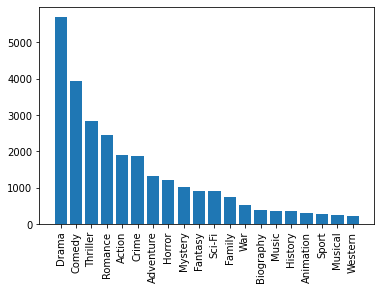

In [43]:
genrecount = genredf.sum()
genrecount = genrecount.sort_values(ascending=False)
plt.bar(genrecount.index[:20],genrecount[:20])
plt.xticks(rotation=90)
plt.show()

 We know from this graph that the most popular genre by count is Drama from 24 other genres.